In [63]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [64]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, import_ave_time
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 1 & tutorial name: breaking-a-carbon-nanotube
figures will be saved in /docs/sphinx/source/tutorials/figures/level1/breaking-a-carbon-nanotube/


In [65]:
_, stress_breakable = import_ave_time(filename="output_cnt_stress1.dat", folder="breakable-bonds/")
_, strain_breakable = import_ave_time(filename="output_cnt_strain1.dat", folder="breakable-bonds/")
_, stress_unbreakable = import_ave_time(filename="output_cnt_stress2.dat", folder="unbreakable-bonds/")
_, strain_unbreakable = import_ave_time(filename="output_cnt_strain2.dat", folder="unbreakable-bonds/")

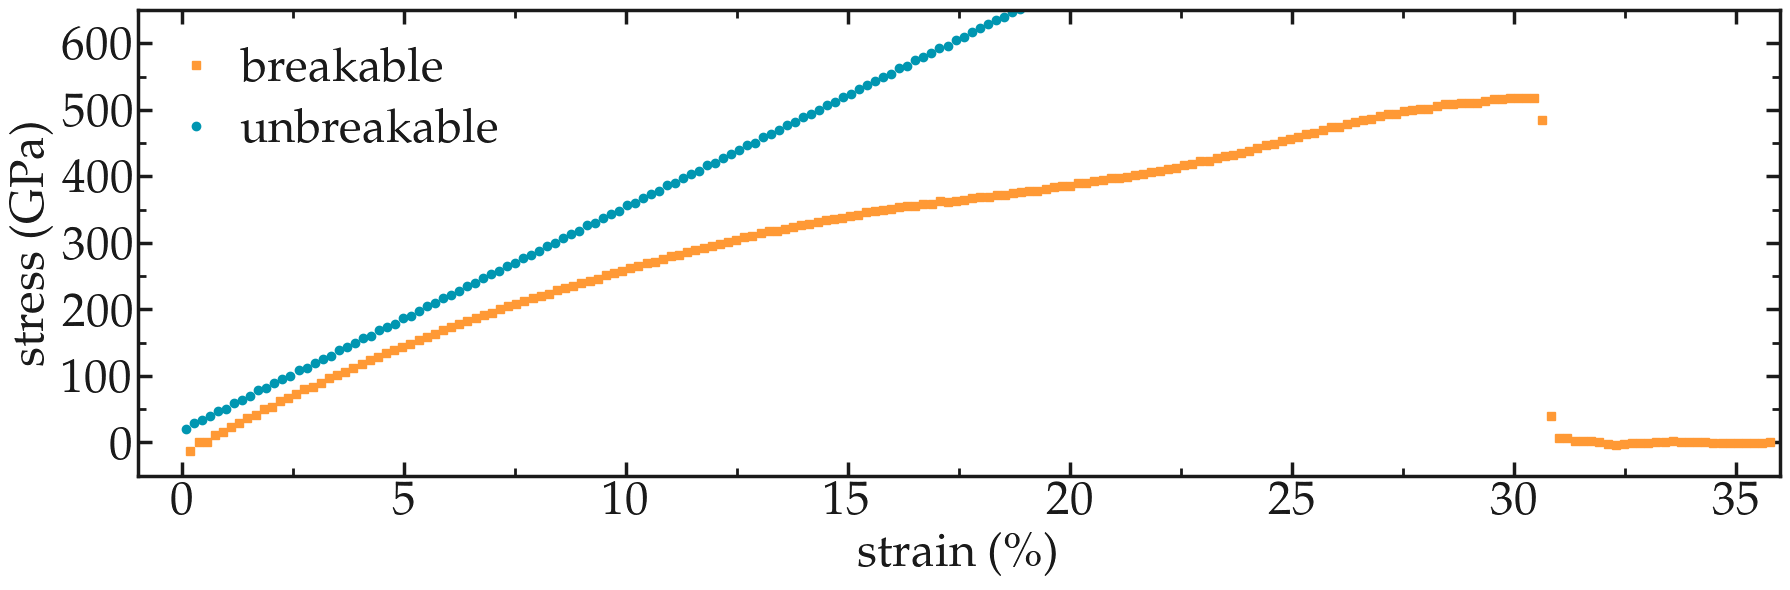

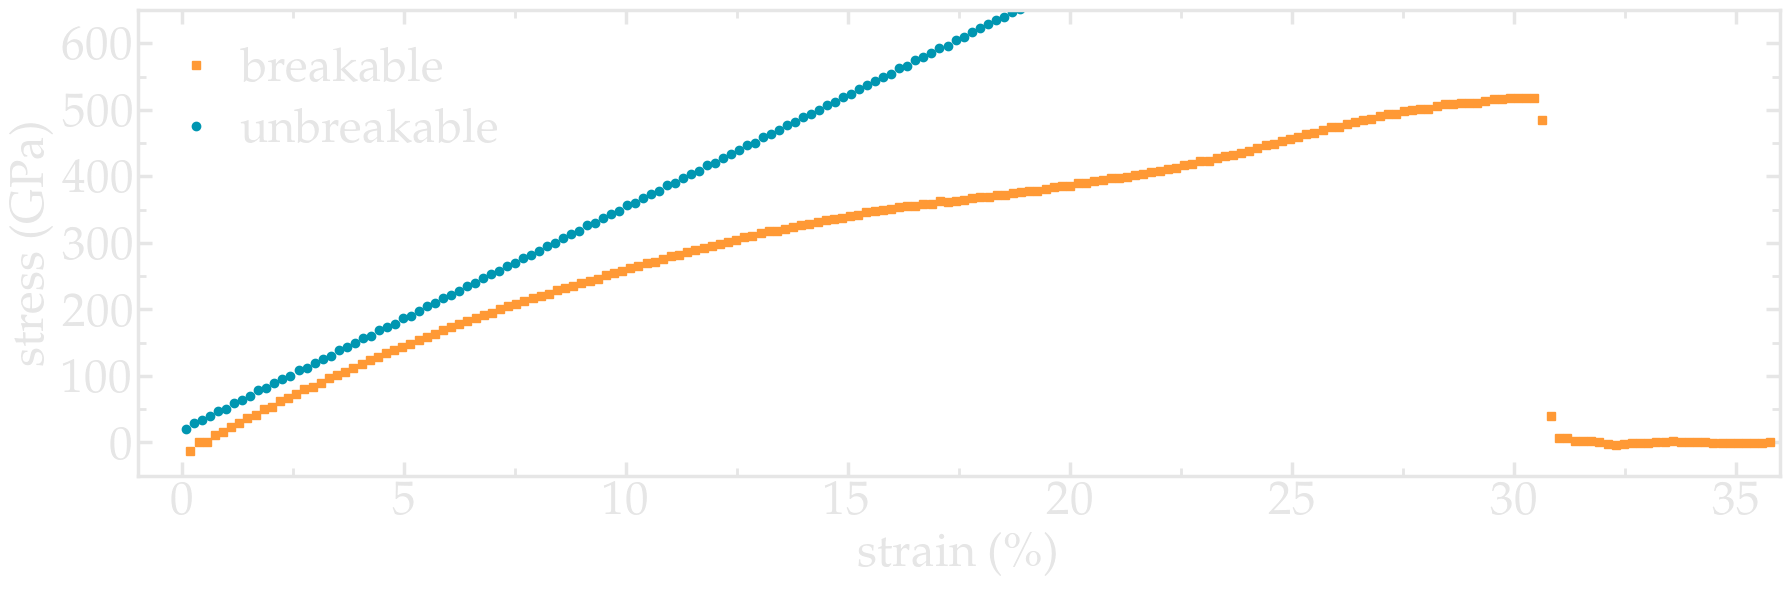

In [66]:
filename = "stress-strain-curve"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    #line = np.arange(50, 70, 0.1)
    #ax[-1].plot(line*0+5, line, '--', color=mygray, linewidth=3.5)
    ax[-1].plot(strain_breakable, stress_breakable/1e9, 's', color=colors["myorange"], linewidth=3.5, label=r"breakable")
    ax[-1].plot(strain_unbreakable, stress_unbreakable/1e9, 'o', color=colors["myblue"], linewidth=3.5, label=r"unbreakable")
    complete_panel(ax[-1], r'strain ($\%$)', r'stress (GPa)', legend=True, axis_color=mygray, locator_y=2)
    set_boundaries(plt, x_ticks=np.arange(0, 40, 5), y_ticks=np.arange(0, 650, 100),
                   x_boundaries=(-1, 36), y_boundaries=(-50, 650))
    save_figure(fig, mode, git_path, path_figures, filename)